Import all the necessary modules:

In [320]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

Read the original dataset:

In [321]:
data_frame = pd.read_csv("../datasets/train-balanced-sarcasm.csv")
data_frame.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


Drop the irrelevant features:

In [322]:
data_frame = data_frame.drop(columns=["author", "subreddit", "score", "downs", "date", "created_utc"])
data_frame

,label,comment,ups,parent_comment
0,0,NC and NH.,-1,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,-1,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",3,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",-1,deadass don't kill my buzz
4,0,I could use one of those tools.,-1,Yep can confirm I saw the tool they use for th...
...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,2,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",1,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,1,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,1,I've always been unsettled by that. I hear a l...


In [323]:
data_frame.dropna()

,label,comment,ups,parent_comment
0,0,NC and NH.,-1,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,-1,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",3,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",-1,deadass don't kill my buzz
4,0,I could use one of those tools.,-1,Yep can confirm I saw the tool they use for th...
...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,2,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",1,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,1,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,1,I've always been unsettled by that. I hear a l...


In [324]:
def normalize(comment: str) -> str:
    """Normalizes the comments by lowering it. For case consistency:"""
    comment = comment.lower()
    return comment

In [325]:
data_frame["comment"] = data_frame["comment"].astype(str)
data_frame["comment"] = data_frame["comment"].apply(normalize)
data_frame["parent_comment"] = data_frame["parent_comment"].astype(str)
data_frame["parent_comment"] = data_frame["parent_comment"].apply(normalize)
data_frame

,label,comment,ups,parent_comment
0,0,nc and nh.,-1,"yeah, i get that argument. at this point, i'd ..."
1,0,you do know west teams play against west teams...,-1,the blazers and mavericks (the wests 5 and 6 s...
2,0,"they were underdogs earlier today, but since g...",3,they're favored to win.
3,0,"this meme isn't funny none of the ""new york ni...",-1,deadass don't kill my buzz
4,0,i could use one of those tools.,-1,yep can confirm i saw the tool they use for th...
...,...,...,...,...
1010821,1,i'm sure that iran and n. korea have the techn...,2,"no one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",1,in a move typical of their recent do-nothing a...
1010823,1,perhaps this is an atheist conspiracy to make ...,1,screw the disabled--i've got to get to church ...
1010824,1,the slavs got their own country - it is called...,1,i've always been unsettled by that. i hear a l...


In [326]:
non_sarcastic = data_frame.loc[data_frame["label"] == 0]
non_sarcastic = non_sarcastic[:270000]
non_sarcastic.shape

(270000, 4)

In [327]:
sarcastic = data_frame.loc[data_frame["label"]==1]

In [328]:
data_frame = pd.concat([non_sarcastic, sarcastic[:400000]])

In [329]:
data_frame.head()

,label,comment,ups,parent_comment
0,0,nc and nh.,-1,"yeah, i get that argument. at this point, i'd ..."
1,0,you do know west teams play against west teams...,-1,the blazers and mavericks (the wests 5 and 6 s...
2,0,"they were underdogs earlier today, but since g...",3,they're favored to win.
3,0,"this meme isn't funny none of the ""new york ni...",-1,deadass don't kill my buzz
4,0,i could use one of those tools.,-1,yep can confirm i saw the tool they use for th...


create the vectors!

In [330]:
vectorizer = TfidfVectorizer()
X_parent = vectorizer.fit_transform(data_frame["parent_comment"].values)
X_parent

<670000x184217 sparse matrix of type '<class 'numpy.float64'>'
	with 12693291 stored elements in Compressed Sparse Row format>

In [331]:
X_reply = vectorizer.transform(data_frame["comment"].values)
X_reply

<670000x184217 sparse matrix of type '<class 'numpy.float64'>'
	with 6230217 stored elements in Compressed Sparse Row format>

In [332]:
X = X_parent + X_reply
#X = hstack((X, np.maximum(data_frame[['ups']].values,0)))
X

<670000x184217 sparse matrix of type '<class 'numpy.float64'>'
	with 18012247 stored elements in Compressed Sparse Row format>

In [333]:
y = data_frame["label"]

Split the test and train data: 

In [334]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

Train the simple model:

In [335]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [336]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [337]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57     88931
           1       0.71      0.78      0.75    132169

    accuracy                           0.68    221100
   macro avg       0.67      0.66      0.66    221100
weighted avg       0.68      0.68      0.68    221100



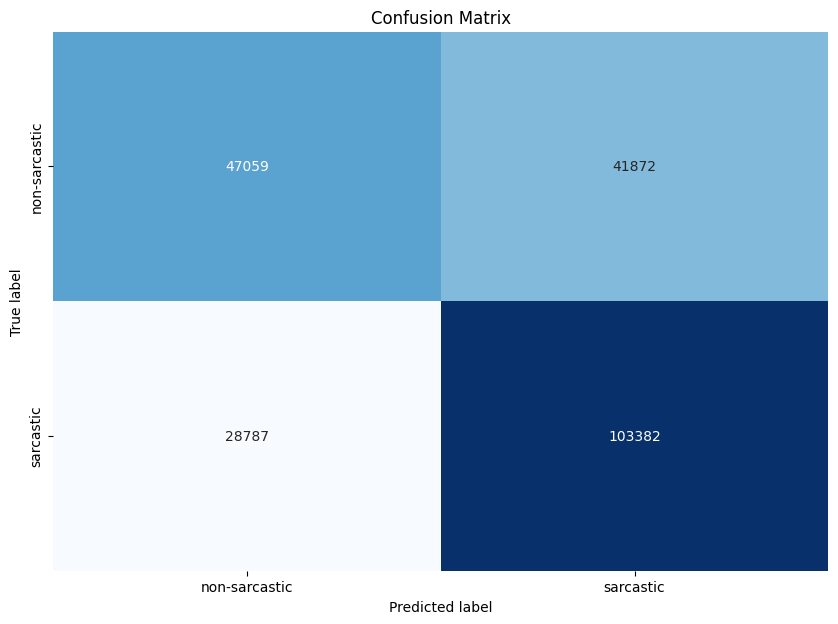

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names=None):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=cm, cmap='Blues', fmt='d', cbar=False,
                xticklabels=class_names, yticklabels=class_names)

    # Set the axis labels
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Set the title
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()
plot_confusion_matrix(y_test, y_pred, ["non-sarcastic", "sarcastic"])

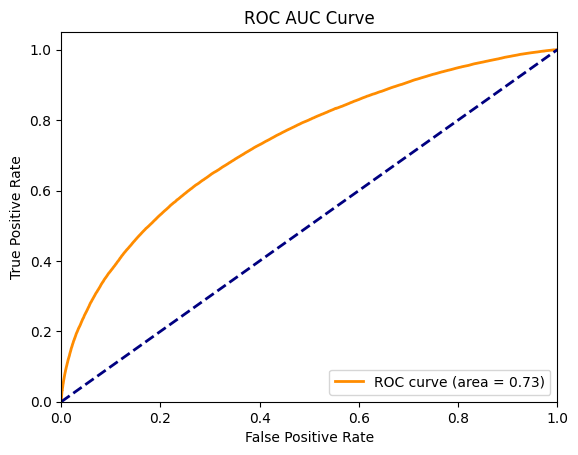

In [339]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf.predict_proba(X_test)
def plot_roc_auc_curve(y_true, y_pred_proba, title='ROC AUC Curve'):
    # Compute the ROC curve points and AUC score
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create the ROC curve plot
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

plot_roc_auc_curve(y_test, y_pred_proba[:,1])


In [340]:
import numpy as np
from sklearn.metrics import roc_curve

def find_best_threshold(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Calculate the Youden's J statistic for each threshold
    j_scores = tpr - fpr
    
    # Find the index of the best threshold
    best_threshold_index = np.argmax(j_scores)
    
    # Return the best threshold
    return thresholds[best_threshold_index]

threshold = find_best_threshold(y_test, y_pred_proba[:,1])
threshold

0.617766026378464

In [341]:
def make_predictions(y_proba) -> int:
    predictions = list()
    for value in y_proba[:,1]:
        if value >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

In [342]:
print(classification_report(y_test, make_predictions(y_pred_proba)))

              precision    recall  f1-score   support

           0       0.56      0.73      0.63     88931
           1       0.77      0.62      0.68    132169

    accuracy                           0.66    221100
   macro avg       0.67      0.67      0.66    221100
weighted avg       0.69      0.66      0.66    221100



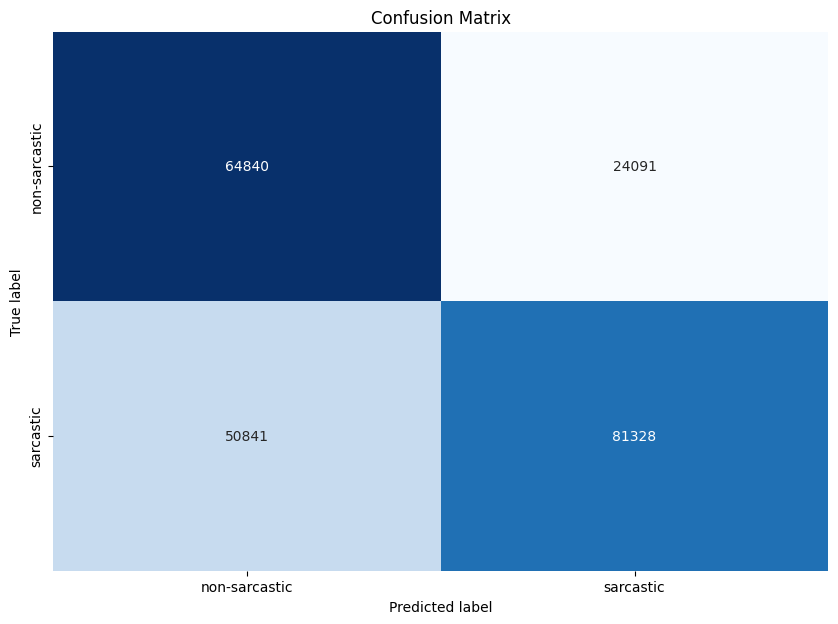

In [343]:
plot_confusion_matrix(y_test, make_predictions(y_pred_proba), ["non-sarcastic", "sarcastic"])

In [344]:
print(accuracy_score(y_test, make_predictions(y_pred_proba)))

0.6610945273631841
